In [439]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import os
import sys
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [34]:
PROJECT_PATH = '../'
DATA_PATH = '/scratch/ceph/swei20/data/ae/dataset/test'
PCA_PATH = '/scratch/ceph/dobos/data/pfsspec/import/stellar/rbf/bosz_5000_full/pca/spectra.h5'
sys.path.insert(0, PROJECT_PATH)

In [6]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [7]:
import tensorflow as tf
# tf.enable_v2_behavior()
gpus = tf.config.list_physical_devices('GPU') 
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Loading Data

In [35]:
with h5py.File(PCA_PATH, 'r') as f:
    flux = f['flux'][()]

In [39]:
def prepro_pca(flux, dim=300):
    flux0 = flux.reshape(-1, 1000)[:, :dim]    
    flux_clean = flux0[~np.isnan(flux0[:,0])]    
    print(flux_clean.shape, flux0.shape)
    print('min', flux_clean.min(), 'max', flux_clean.max(),'mean', flux_clean.mean(),'std', flux_clean.std() )
    return flux_clean

In [40]:
flux1 = prepro_pca(flux, dim=300)

(116614, 300) (243936, 300)
min -184.9254058126797 max 145.24091665337806 mean -0.10353327716635463 std 2.4000601615265493


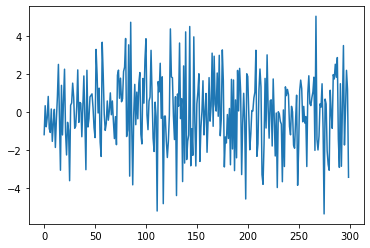

In [472]:
plt.plot(flux_std[10])

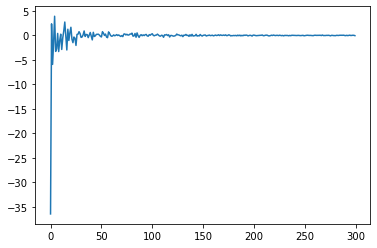

In [471]:

plt.plot(flux1[10])

In [394]:
std300 = flux1.std(axis=0)

In [395]:
flux_std = flux1 / std300

In [400]:
DATA_PATH = "/home/swei20/AE/data"
SAVE_PATH = os.path.join(DATA_PATH, 'pca.h5')

In [156]:
with h5py.File(SAVE_PATH, 'w') as f:
    f.create_dataset('flux300', data = flux1)
#     f.create_dataset('flux10kmm', data = flux10kmm)

In [415]:
with h5py.File(SAVE_PATH, 'a') as f:
    f.create_dataset('flux_std50k', data = flux_std10)
#     f.create_dataset('flux10kmm', data = flux10kmm)

In [27]:
with h5py.File(fn, 'r') as f:
    flux10kmm = f['flux10kmm'][()]
#     flux10kmm = f['flux10kmm'][()]

array([     0,      1,      2, ..., 116611, 116612, 116613])

In [412]:
rd_idx=np.random.choice(np.arange(flux_std.shape[0]), 50000, replace=False)

In [413]:
flux_std10 = flux_std[rd_idx, :]

In [425]:
flux_std.max()

65.22153046740915

In [ ]:
np.random

In [448]:
a = str([1,2])

In [462]:
c = ""

In [465]:
for i in [2,3]:
    c= c+ str(i)

SyntaxError: invalid syntax (<ipython-input-465-3c573d4cd3cf>, line 2)

In [466]:
c


'23'

In [463]:
[c. str(i) for i in [1,2]]

['1', '2']

In [455]:
a.replace(",", "")

'[1 2]'

In [ ]:
a[]

In [403]:
flux_std1

(116614, 300)

## AE

In [440]:
from ae.pipeline.simple_ae_pipeline import SimpleAEPipeline

In [419]:
sp=SimpleAEPipeline()

In [421]:
config_dict ={ 
    "data": {
      "dir":"./data",
      "filename": "pca.h5",
      "train": "flux_std50k",
      "norm": "no"
    },
    "model":{
      "aug": 1,
      "name": "tnh_l_lky",
      "input_dim": 300,
      "latent_dim": 8,
      "hidden_dims": [128, 32],
      "dropout": 0.0,
      "lr": 0.001,
      "reg1": 0.0,
      "loss": "mae",
      "opt": "adam",
      "batchnorm": 0,
      "act_in": "tanh",
      "act_em": "linear",
      "act_hd": "leaky"
    },
    "trainer":{
      "epoch": 500,
      "batch_size": 64,
      "validation_split":0.2,
      "verbose_training": 1
    },
    "callbacks":{
        "checkpoint_monitor": "val_loss",
        "checkpoint_mode": "min"
    }
}
config = DotMap(config_dict)

In [422]:
from ae.model.simple_ae_model import SimpleAEModel
from ae.trainer.simple_ae_trainer import SimpleAETrainer

In [446]:
len([])

0

In [423]:
mm = SimpleAEModel()
mm.build_model(config)

INFO:root:Layers: [300, 128, 32, 8]
INFO:root:NAME: mae_lr3_l8_h2_tnh_l_lky_0701_190131


In [426]:
data = flux_std10
tt = SimpleAETrainer(mm, config)
history = tt.train((data, data), ep=10)

Epoch 1/10
625/625 [==============================] - 2s 3ms/step - loss: 0.5783 - acc: 0.1176 - val_loss: 0.5331 - val_acc: 0.2006
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5254 - acc: 0.2237 - val_loss: 0.5033 - val_acc: 0.2508
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5026 - acc: 0.2687 - val_loss: 0.4866 - val_acc: 0.2933
Epoch 4/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4876 - acc: 0.3051 - val_loss: 0.4743 - val_acc: 0.3167
Epoch 5/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4773 - acc: 0.3232 - val_loss: 0.4656 - val_acc: 0.3397
Epoch 6/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4698 - acc: 0.3392 - val_loss: 0.4596 - val_acc: 0.3381
Epoch 7/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4641 - acc: 0.3515 - val_loss: 0.4542 - val_acc: 0.3602
Epoch 8/10
625/625 [==============================] - 1s 2ms/step - loss: 0.

In [442]:
history

In [429]:
mm.model.__dict__

{'_self_setattr_tracking': True,
 '_is_model_for_instrumentation': True,
 '_instrumented_keras_api': True,
 '_instrumented_keras_layer_class': False,
 '_instrumented_keras_model_class': True,
 '_trainable': True,
 '_stateful': False,
 'built': True,
 '_input_spec': None,
 '_build_input_shape': TensorShape([None, 300]),
 '_saved_model_inputs_spec': TensorSpec(shape=(None, 300), dtype=tf.float32, name='spec'),
 '_supports_masking': True,
 '_name': 'ae',
 '_activity_regularizer': None,
 '_trainable_weights': [],
 '_non_trainable_weights': [],
 '_updates': [],
 '_thread_local': <_thread._local at 0x7f77e0692770>,
 '_callable_losses': [],
 '_losses': [],
 '_metrics': [],
 '_metrics_lock': <unlocked _thread.lock object at 0x7f7a60bc0480>,
 '_dtype_policy': <Policy "float32">,
 '_compute_dtype_object': tf.float32,
 '_autocast': False,
 '_self_tracked_trackables': [<tensorflow.python.keras.engine.input_layer.InputLayer at 0x7f7a60c2fa00>,
 '_inbound_nodes_value': [],
 '_outbound_nodes_value': 

In [433]:
mm.model.history.history

{'loss': [0.578345000743866,
  0.5254031419754028,
  0.5025926232337952,
  0.4875563085079193,
  0.47726771235466003,
  0.4697849154472351,
  0.4640626609325409,
  0.4592728614807129,
  0.45541977882385254,
  0.452212393283844],
 'acc': [0.11760000139474869,
  0.22374999523162842,
  0.2687250077724457,
  0.3050999939441681,
  0.32315000891685486,
  0.3391749858856201,
  0.3514750003814697,
  0.36227500438690186,
  0.3682999908924103,
  0.3754499852657318],
 'val_loss': [0.5331188440322876,
  0.5033410787582397,
  0.4866437017917633,
  0.4742725193500519,
  0.4656156599521637,
  0.4595973491668701,
  0.45419448614120483,
  0.44989466667175293,
  0.4465012550354004,
  0.44345396757125854],
 'val_acc': [0.20059999823570251,
  0.2508000135421753,
  0.29330000281333923,
  0.3167000114917755,
  0.33970001339912415,
  0.33809998631477356,
  0.3601999878883362,
  0.37119999527931213,
  0.3799999952316284,
  0.38989999890327454],
 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0

In [377]:
a = [128, 32]

In [391]:
mm.model.loss

'mae'

In [381]:
a[::-1][1:]

[128]

In [259]:
# cmd = "main --config /home/swei20/AE/configs/ae/train/pca_config.json --lr 2"
# sys.argv = cmd.split()
# sp=SimpleAEPipeline()
# sp.prepare()
# sp.run()